In this exercise you will again apply what you've learned in the lecture. This model is for a classifier and will use the standard MNIST handwritten zip code dataset. Run each of the cells to create the classifier model, train the model, and test the model to see how well the model performs. 

You can modify parameters in certain cells to change the way that the training is performed and see what happens. Experiment to see if you can get better results than the defaults. 

In [1]:
# cell 1
# notebook version 1.2

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np

%pylab inline

print ('cell finished')

C:\Users\ktnng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib
cell finished


Resetting the default graph is a good safety measure to make sure you are starting from a clean slate.

In [2]:
# cell 2

tf.reset_default_graph()

print ('cell finished')

cell finished


In the lecture we discussed the MNIST data set and the specialized python code created for this example to read the data set into appropriate variables. The read_data_sets function will download the raw data set, convert it into python data types, and store the information in the mnist variable. Once this is done we can examine the data set and use it to train, validate, and test our model. 

This cell downloads MNIST data into directory specified if it doesn't already exist and imports the MNIST dataset into variable mnist.

In [3]:
# cell 3

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

print ('cell finished')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
cell finished


This cell is meant to help understand the details of the MNIST dataset. You will notice a number of print statements that will print out different aspects of MNIST. Uncomment these and run the cell to see the results. 

The first print statement (2 lines) will print out the sizes of the train, validation, and test sets. 

The second shows how the labels are formatted as one hot arrays so that the labels match with the output of the neurons. You can change the index used to pick a particular image to see different labels. 

The next print statement uses the argmax function to return the index of the highest value in the label array. 

The next print statement prints out the number of pixels for an image in the training data. 

The final two statements plot the image from the index. Again feel free to modify the indices to see different images.

Train, validation, test: 55000, 5000, 10000
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
784


Text(0.5,1,'Label: 3')

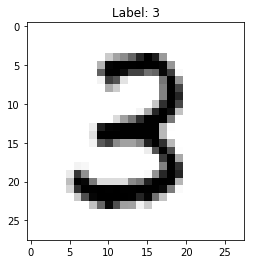

In [23]:
# cell 4

# Run this cell to understand the format of the dataset. Uncomment the print commands one by one to understand what
# the data set looks like. As you uncomment a line use shift-enter to run the cell once more. In the first print you
# actually have to uncomment two lines or you will get an error. 

# 1. There are 55k, 5k, and 10k examples in train, validation, and test.
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

# 2. The format of the labels is 'one-hot'. Labels match with output of neurons.
# The fifth image happens to be a '1'.
# This is represented as '[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]'
print (mnist.train.labels[11])

# You can find the index of the label, like this:
print (np.argmax(mnist.train.labels[11]))

# 3. An image is a 'flattened' array of 28*28 = 784 pixels.
print (len(mnist.train.images[11]))

# 4. To display an image, first reshape it to 28x28.
pylab.imshow(mnist.train.images[11].reshape((28,28)), cmap=pylab.cm.gray_r)   
pylab.title('Label: %d' % np.argmax(mnist.train.labels[11])) 

The next cell declares a number of constants we will use during the training process. There are 10 image classes, each image is 28 x 28 pixels. 

The default values for training are shown. Feel free to experiment to see how they change results, but don't change the number of classes or pixels or the model won't work anymore. 


In [24]:
# cell 5

NUM_CLASSES = 10
NUM_PIXELS = 28 * 28

BATCH_SIZE = 100
LEARNING_RATE = 0.5
EPOCHS = 2000

print ('cell finished')

cell finished


This model will use two placeholders to feed information into the model. The `x` placeholder will accept the training or testing images so that they can be fed into the rest of the network. 

The `y_` placeholder accepts the expected network output value. It's value is compared to the generated value from the network and the loss calculated. 

Variable `w` is the trainable variable used to hold the weights per pixel and `b` is the bias. These values will be updated through the training process so that the model learns how to classify the digits. 

In [26]:
# cell 6

# Define input variables

x = tf.placeholder(tf.float32, [None,NUM_PIXELS])
# Accepts training/testing images
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])
# Accepts the expected network output value. Compared to generated value from network and loss calculated

w = tf.Variable(tf.truncated_normal([NUM_PIXELS,NUM_CLASSES], stddev=0.1))
# Weights per pixel
b = tf.Variable(tf.zeros([10]))
# Bias
# Weights and bias are updated throughout the training process to help the model learn

print ('cell finished')

cell finished


The next cell specifies the matrix multiplication operation that does the inference step in the training process. The current values of `w` and `b` are used to predict the classification of the pixels input through the `x` placeholder. The output `y` is the current inferred output value.

In [27]:
# cell 7

y = tf.matmul(x,w) + b

print ('cell finished')

cell finished


The next step is to compare the calculated output value in `y` against the expected output passed in through the `y_` placeholder. This is done with the `tf.nn.softmax_cross_entropy_with_logits` function as discussed in the lecture. The value from this function is computed per training example. The mean of all loss values for a batch is gathered in variable `cross_entropy`. This loss value is used passed to an optimizer that will train the model based on the specified LEARNING_RATE. 

Since the optimizer understands the model graph, the trainable weights and biases are updated according to the loss values as training proceeds. The variable `train_step` actually specifies an operation that updates the weights and biases in accordance with the loss value.  

In [28]:
# cell 8

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# Finds the mean of loss values for one batch

train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
# Specifies an operation that updates weights and biases in accordance with the loss value

print ('cell finished')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

cell finished


The process of training the model occurs in a session. Sessions can be created on the local machine or remote machines, thus the need to initialize variables before data is fed into the model for training or inference. 

In [29]:
# cell 9

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


print ('cell finished')

cell finished


Let's try the model out before it is trained to see how well it does. Since the weights and biases are random values there is a chance (about 1 in 10) that the correct value is returned from classification. This code will allow you to try an example to see if it works. 

The `image_index` variable is used to grab an example from the testing data. The expected label is captured in variable `exp_label`. The pixel data is captured in `x_image`. These values are fed to the network and the session run to predict the output in variable `outval`. Variable `label` is then calculated from the argmax of the outval. 

The results are printed out and the image plotted so you can see which one it is. 

Experiment with the `image_index` variable to see if you can find images where the untrained model correctly predicts the label. You will need to change the index and rerun this cell. 

calculated label = 7 expected label = 7


Text(0.5,1,'Label: 7')

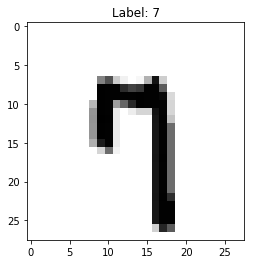

In [53]:
# cell 10

image_index = 80
exp_label = np.argmax(mnist.test.labels[image_index], 0)
x_image = np.reshape(mnist.test.images[image_index], [-1,784])

outval = sess.run(y, feed_dict={x:x_image})
label= np.argmax(outval[0],0)

print ("calculated label = {} expected label = {}".format(label, exp_label))
pylab.imshow(mnist.test.images[image_index].reshape((28,28)), cmap=pylab.cm.gray_r)   
pylab.title('Label: %d' % np.argmax(mnist.test.labels[image_index])) 

This next cell is where all the magic happens. The training data is applied to the model and the `train_step` is repeatedly run to adjust the trainable variables `w` and `b`. 

Notice that the training process is using the `next_batch` method of the dataset input code to retrieve batches of training data that are then applied to the model. 

Every 100 training steps the step and current loss values are output. The loss can be used to gauge the success of the training. 

In [37]:
# cell 11

for t in range(EPOCHS):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  loss, _ = sess.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
  if t%100 == 0:
    print('train_step = {} loss = {}'.format(t,loss))

print ('cell finished')

train_step = 0 loss = 2.6818978786468506
train_step = 100 loss = 0.33554136753082275
train_step = 200 loss = 0.25595197081565857
train_step = 300 loss = 0.2848292291164398
train_step = 400 loss = 0.3364478051662445
train_step = 500 loss = 0.3536141514778137
train_step = 600 loss = 0.24208836257457733
train_step = 700 loss = 0.3684713840484619
train_step = 800 loss = 0.2541218400001526
train_step = 900 loss = 0.39833882451057434
train_step = 1000 loss = 0.3820236623287201
train_step = 1100 loss = 0.182321697473526
train_step = 1200 loss = 0.30529728531837463
train_step = 1300 loss = 0.2944149672985077
train_step = 1400 loss = 0.21205317974090576
train_step = 1500 loss = 0.2824811637401581
train_step = 1600 loss = 0.25405314564704895
train_step = 1700 loss = 0.2688947021961212
train_step = 1800 loss = 0.26403558254241943
train_step = 1900 loss = 0.11974512040615082
cell finished


Now that the model is trained it is time to see how well it does the classification. A correct classification is one where the predicted label is the same as the expected label. Remember the label is specified by the index of the argument that has the highest value in the output vector from the neurons. The argmax function will return this value. 

If this value is compared to the expected output value, the two should match for a correct prediction. 

Variable `correct_prediction` is a vector of boolean values for the entire batch. Variable `accuracy` converts the boolean values to float32 values and calculates the mean. More true values gives a higher mean, or a higher accuracy

In [38]:
# cell 12

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x:mnist.train.images, y_:mnist.train.labels}))



0.9211636



The previous cell showed the training accuracy because it used the training images. To get the testing accuracy let's run the accuracy on the test images. 

In [39]:
# cell 13

print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))


0.9205


The testing accuracy is slightly different, but remember we did not train on those images, the model has never seen those images before, so having a similar accuracy is a good sign. You might think that over 90% accuracy is good, but the accuracy of this model has great room for improvement. As we move forward we will develop more accurate models.

Go back to cell 10 and change the image_index once more. The model now uses the trained weight values. Nine out of ten times as we see by the accuracy it should pick the correct label.

**IMPORTANT: When you are finished make sure you go to the Jupyter notebook “File” menu above and select “Close and halt”. This will shutdown this notebook and take you back to the Jupyter Notebook Home tab.**